# Caso

Estamos buscando maneiras de identificar nossos clientes-chave e fatores de sucesso na
plataforma para identificar padrões e replicar ações para toda a base. Para isso gostaríamos
de analisar a base de pedidos dos nossos lojistas, ou seja, compras efetuadas em sites que
utilizam a nossa plataforma de e-commerce internacionalmente.

Com esses dados em mãos, poderemos propor ações que ajudem nossos lojistas a venderem
mais e por consequência ficarem mais satisfeitos com a nossa plataforma. Para isso os
seguintes dados estão sendo disponibilizados:

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mpltick
import numpy as np
import seaborn as sns
from IPython.display import display

%matplotlib inline

rc = {"font.family": "Ubuntu",  # fonte charmosa :P
      "mathtext.fontset": "cm",  # texto matemático em LaTeX
      "font.size": 14,  # Usar tamanho 12 ou 14 pra colocar em documentos
      "axes.axisbelow": True,  # grid abaixo dos dados
      'image.cmap': 'PiYG'}  # Cmap com as cores parecidas com da Bagy :)

plt.rcParams.update(rc)

df = pd.read_csv('./data/clean_teste_dados_ecommerce.csv', sep=';')
# Por algum motivo o dataset original dava erro de encoding. Pra limpar ele subi no Gsheets e baixei como .csv e renomeei pra 'clean_*.csv'


df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StoreId      540670 non-null  float64
 2   StockCode    540670 non-null  object 
 3   Description  539216 non-null  object 
 4   Quantity     540670 non-null  float64
 5   InvoiceDate  540670 non-null  object 
 6   UnitPrice    540670 non-null  float64
 7   CustomerID   406289 non-null  float64
 8   Country,,    540670 non-null  object 
dtypes: float64(4), object(5)
memory usage: 37.2+ MB


In [12]:
df.describe()


,StoreId,Quantity,UnitPrice,CustomerID
count,540670.000000,540670.000000,540670.000000,406289.000000
mean,10.489578,9.543128,4.616905,15287.609957
std,5.766419,218.307139,96.870533,1713.619599
min,1.000000,-80995.000000,-11062.060000,12346.000000
25%,5.000000,1.000000,1.250000,13954.000000
50%,10.000000,3.000000,2.080000,15152.000000
75%,15.000000,10.000000,4.130000,16791.000000
max,20.000000,80995.000000,38970.000000,18287.000000


Lendo o arquivo de dados é possível perceber que uma das colunas está formatada com duas vírgulas extras. Assim, vamos renomear e verificar na próxima célula a quantidade de informações nulas:

In [13]:
df.rename(columns={'Country,,': 'Country'}, inplace=True)
df.isna().sum()


InvoiceNo           0
StoreId          1239
StockCode        1239
Description      2693
Quantity         1239
InvoiceDate      1239
UnitPrice        1239
CustomerID     135620
Country          1239
dtype: int64

In [14]:
df.head()


,InvoiceNo,StoreId,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,11.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/01/10 08:26,2.55,17850.0,"United Kingdom,,"
1,536365,9.0,71053,WHITE METAL LANTERN,6.0,12/01/10 08:26,3.39,17850.0,"United Kingdom,,"
2,536365,17.0,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/01/10 08:26,2.75,17850.0,"United Kingdom,,"
3,536365,15.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/01/10 08:26,3.39,17850.0,"United Kingdom,,"
4,536365,17.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/01/10 08:26,3.39,17850.0,"United Kingdom,,"


O campo de "País" ainda consta com *trailing commas*, i.e vírgulas sobrando, então: 

In [15]:
df['Country'] = df['Country'].str.replace(',', '', regex=True)

df.head()


,InvoiceNo,StoreId,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,11.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/01/10 08:26,2.55,17850.0,United Kingdom
1,536365,9.0,71053,WHITE METAL LANTERN,6.0,12/01/10 08:26,3.39,17850.0,United Kingdom
2,536365,17.0,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/01/10 08:26,2.75,17850.0,United Kingdom
3,536365,15.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/01/10 08:26,3.39,17850.0,United Kingdom
4,536365,17.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/01/10 08:26,3.39,17850.0,United Kingdom


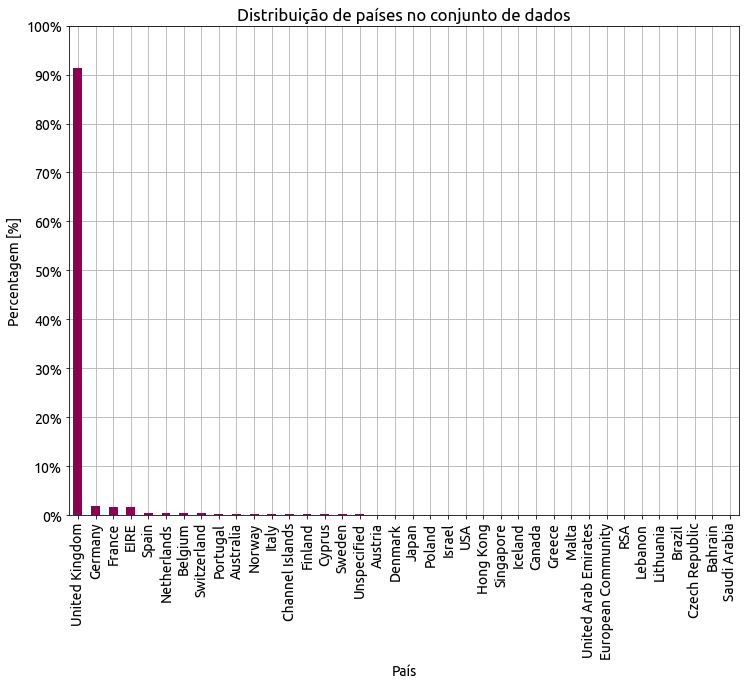

In [16]:
f, ax = plt.subplots(figsize=(12, 9))
df['Country'].value_counts(normalize=True).plot.bar(cmap='PiYG', ax=ax)

ax.yaxis.set_major_formatter(mpltick.PercentFormatter(1))
ax.grid()
ax.set(
  title='Distribuição de países no conjunto de dados',
  xlabel='País',
  ylabel='Percentagem [%]',
  yticks=np.arange(0, 1.1, 0.1))

f.savefig('./doc/teste_bagy/fig/paises.pdf')
plt.show()


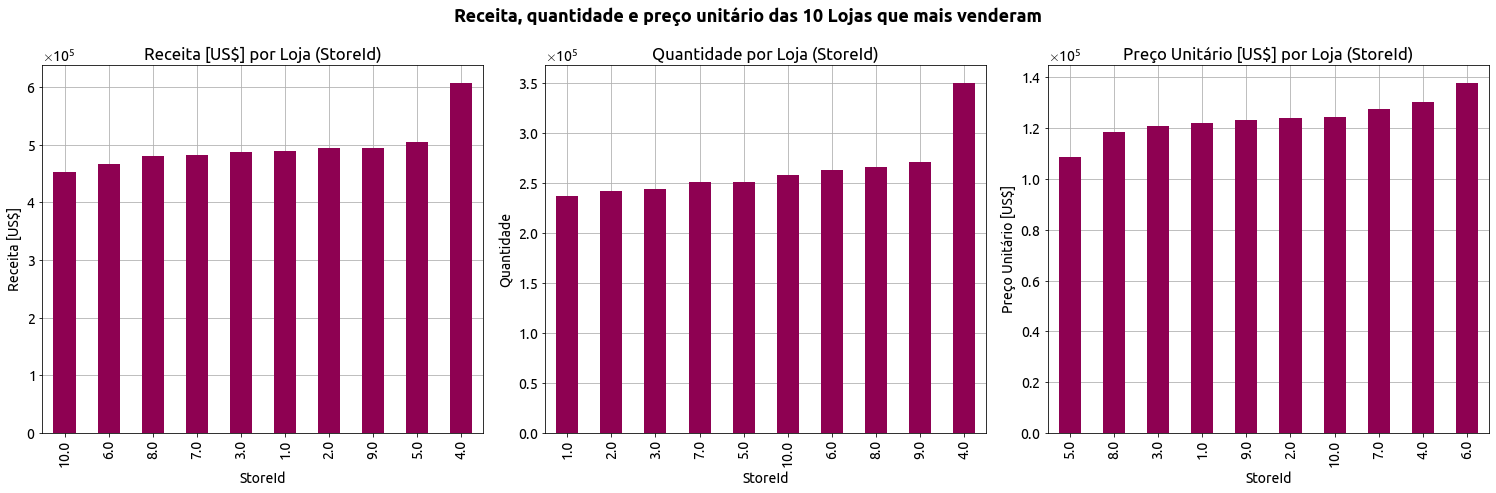

In [18]:
df['Income'] = df['Quantity'] * df['UnitPrice']

stores_group = df.groupby('StoreId').sum()

f, ax = plt.subplots(ncols=3, figsize=(21,7))

f.suptitle('Receita, quantidade e preço unitário das 10 Lojas que mais venderam',
  fontsize=18,
  fontweight='bold')

cols = ['Income', 'Quantity', 'UnitPrice']
labels = [r'Receita [US$]', 'Quantidade', r'Preço Unitário [US$]']

for i in range(len(cols)):
  stores_group.loc[:10, cols[i]].sort_values().plot.bar(ax=ax[i], cmap='PiYG')

  ax[i].ticklabel_format(
      axis='y',
      style='sci',
      useMathText=True,
      scilimits=(0, 0))

  ax[i].set(
    ylabel=labels[i],
    title = f'{labels[i]} por Loja (StoreId)'
  )

  ax[i].grid()

f.tight_layout()
f.savefig('./doc/teste_bagy/teste.pdf')

plt.show()